In [1]:
import os
path = os.getcwd()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1 划分数据集

In [3]:
data = pd.read_csv(path + '/creditcard.csv')

In [4]:
# 划分数据集
X = data.drop(['Class'], axis = 1).values
Y = data['Class'].values
del data

# 2 训练模型

In [5]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics

In [6]:
# 划分训练集与测试集
randomState = 10
np.random.seed(randomState)
X_dtrain, X_deval, y_dtrain, y_deval = train_test_split(X,
                                                        Y,
                                                        test_size = 0.3,
                                                        random_state = randomState)

## 2.1 Logistic算法训练模型

In [7]:
# Logistic分类
from sklearn.linear_model import LogisticRegression
# 网格搜索
from sklearn.grid_search import GridSearchCV

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
# 需搜索的参数
log_param_grid = {'C': list(np.linspace(0.05, 1, 20))    # 正则项系数的倒数，它必须是一个正的浮点数
                                                         # 像支持向量机一样，值越小则正则化更强
                  }
gsearch = GridSearchCV(
    estimator = LogisticRegression(tol = 1e-8,
                                   class_weight = 'balanced',
                                   solver = 'sag',
                                   max_iter = 500,
                                   multi_class = 'ovr',
                                   n_jobs = -1
                                   ),
    param_grid = log_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.00176, std: 0.00001, params: {'C': 0.05}
mean: 0.39268, std: 0.47891, params: {'C': 0.1}
mean: 0.39902, std: 0.48654, params: {'C': 0.15}
mean: 0.73543, std: 0.37757, params: {'C': 0.2}
mean: 0.54495, std: 0.45184, params: {'C': 0.25}
mean: 0.59541, std: 0.48472, params: {'C': 0.3}
mean: 0.39504, std: 0.48167, params: {'C': 0.35}
mean: 0.58157, std: 0.47386, params: {'C': 0.39999999999999997}
mean: 0.39699, std: 0.48407, params: {'C': 0.44999999999999996}
mean: 0.59089, std: 0.48104, params: {'C': 0.49999999999999994}
mean: 0.20010, std: 0.39669, params: {'C': 0.5499999999999999}
mean: 0.77763, std: 0.38837, params: {'C': 0.6}
mean: 0.39818, std: 0.48550, params: {'C': 0.65}
mean: 0.79307, std: 0.39568, params: {'C': 0.7}
mean: 0.59593, std: 0.48513, params: {'C': 0.75}
mean: 0.38024, std: 0.46448, params: {'C': 0.7999999999999999}
mean: 0.59333, std: 0.48306, params: {'C': 0.85}
mean: 0.59280, std: 0.48264, params: {'C': 0.9}
mean: 0.20057, std: 0.39759, params:

D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [9]:
clf_log = LogisticRegression(tol = 1e-8,
                             C = 0.35,
                             class_weight = 'balanced',
                             solver = 'sag',
                             max_iter = 500,
                             multi_class = 'ovr',
                             n_jobs = -1)
clf_log.fit(X_dtrain, y_dtrain)
y_pred = clf_log.predict(X_deval)
print('Logistic Accuracy  : ', metrics.accuracy_score(y_deval, y_pred))
print('Logistic Recall    : ', metrics.recall_score(y_deval, y_pred))
print('Logistic Precision : ', metrics.precision_score(y_deval, y_pred))
print('Logistic F1 score  : ', metrics.f1_score(y_deval, y_pred))

Logistic Accuracy  :  0.9920180705265499
Logistic Recall    :  0.014184397163120567
Logistic Precision :  0.003669724770642202
Logistic F1 score  :  0.0058309037900874635


D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 2.2 SVM算法训练模型

In [10]:
# 支持向量机分类
from sklearn.svm import SVC

In [11]:
# 网格搜索
from sklearn.grid_search import GridSearchCV
# 测试C参数
SVM_param_grid = {'C': list(range(1, 10))}
gsearch = GridSearchCV(
    estimator = SVC(tol = 1e-8,
                    class_weight = 'balanced',
                    max_iter = 500),
    param_grid = SVM_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.00448, std: 0.00030, params: {'C': 1}
mean: 0.99827, std: 0.00004, params: {'C': 2}
mean: 0.99827, std: 0.00004, params: {'C': 3}
mean: 0.99827, std: 0.00004, params: {'C': 4}
mean: 0.99827, std: 0.00004, params: {'C': 5}
mean: 0.99827, std: 0.00004, params: {'C': 6}
mean: 0.99827, std: 0.00004, params: {'C': 7}
mean: 0.99827, std: 0.00004, params: {'C': 8}
mean: 0.99827, std: 0.00004, params: {'C': 9}

best params :  {'C': 2}

best score :  0.9982745129511847


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [12]:
# 测试kernel参数
SVM_param_grid = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
gsearch = GridSearchCV(
    estimator = SVC(C = 1.0,
                    tol = 1e-8,
                    class_weight = 'balanced',
                    max_iter = 500),
    param_grid = SVM_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.00448, std: 0.00030, params: {'kernel': 'rbf'}
mean: 0.44442, std: 0.10159, params: {'kernel': 'linear'}
mean: 0.55306, std: 0.08615, params: {'kernel': 'poly'}
mean: 0.00176, std: 0.00001, params: {'kernel': 'sigmoid'}

best params :  {'kernel': 'poly'}

best score :  0.5530587267510684


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [13]:
# 测试gamma参数
SVM_param_grid = {'gamma': list(np.linspace((1/30), 1, 30))}
gsearch = GridSearchCV(
    estimator = SVC(C = 1.0,
                    kernel = 'poly',
                    tol = 1e-8,
                    class_weight = 'balanced',
                    max_iter = 500),
    param_grid = SVM_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.55306, std: 0.08615, params: {'gamma': 0.03333333333333333}
mean: 0.55306, std: 0.08615, params: {'gamma': 0.06666666666666667}
mean: 0.48448, std: 0.13249, params: {'gamma': 0.1}
mean: 0.55306, std: 0.08615, params: {'gamma': 0.13333333333333333}
mean: 0.64261, std: 0.17626, params: {'gamma': 0.16666666666666666}
mean: 0.48448, std: 0.13249, params: {'gamma': 0.19999999999999998}
mean: 0.62615, std: 0.14584, params: {'gamma': 0.23333333333333334}
mean: 0.55306, std: 0.08615, params: {'gamma': 0.26666666666666666}
mean: 0.45417, std: 0.12975, params: {'gamma': 0.3}
mean: 0.64261, std: 0.17626, params: {'gamma': 0.3333333333333333}
mean: 0.49740, std: 0.25657, params: {'gamma': 0.36666666666666664}
mean: 0.48448, std: 0.13249, params: {'gamma': 0.39999999999999997}
mean: 0.57037, std: 0.07940, params: {'gamma': 0.43333333333333335}
mean: 0.62615, std: 0.14584, params: {'gamma': 0.4666666666666667}
mean: 0.52197, std: 0.11753, params: {'gamma': 0.5}
mean: 0.55306, s

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [14]:
clf_SVM = SVC(C = 2.0,
              kernel = 'poly',
              gamma = 1/6,
              tol = 1e-8,
              class_weight = 'balanced',
              max_iter = 500)
clf_SVM.fit(X_dtrain, y_dtrain)
y_pred = clf_SVM.predict(X_deval)
print('SVM Accuracy  : ', metrics.accuracy_score(y_deval, y_pred))
print('SVM Recall    : ', metrics.recall_score(y_deval, y_pred))
print('SVM Precision : ', metrics.precision_score(y_deval, y_pred))
print('SVM F1 score  : ', metrics.f1_score(y_deval, y_pred))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM Accuracy  :  0.4228432990414662
SVM Recall    :  0.7446808510638298
SVM Precision :  0.0021262377741327987
SVM F1 score  :  0.004240368306275745


## 2.3 RandomForest算法训练模型

In [15]:
# 随机森林分类器
from sklearn.ensemble import RandomForestClassifier

In [16]:
# 网格搜索
from sklearn.grid_search import GridSearchCV
# 测试n_estimators参数
tree_param_grid = {'n_estimators':list(range(100, 1100, 100))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestClassifier(oob_score = True,
                                       n_jobs = -1,
                                       random_state = 10),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.99949, std: 0.00008, params: {'n_estimators': 100}
mean: 0.99950, std: 0.00008, params: {'n_estimators': 200}
mean: 0.99951, std: 0.00008, params: {'n_estimators': 300}
mean: 0.99950, std: 0.00008, params: {'n_estimators': 400}
mean: 0.99950, std: 0.00008, params: {'n_estimators': 500}
mean: 0.99949, std: 0.00009, params: {'n_estimators': 600}
mean: 0.99949, std: 0.00009, params: {'n_estimators': 700}
mean: 0.99950, std: 0.00009, params: {'n_estimators': 800}
mean: 0.99950, std: 0.00009, params: {'n_estimators': 900}
mean: 0.99950, std: 0.00009, params: {'n_estimators': 1000}

best params :  {'n_estimators': 300}

best score :  0.9995084368291166


In [17]:
# 测试max_depth参数
tree_param_grid = {'max_depth':list(range(3, 10))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestClassifier(n_estimators = 300,
                                       oob_score = True,
                                       n_jobs = -1,
                                       random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.99909, std: 0.00018, params: {'max_depth': 3}
mean: 0.99927, std: 0.00012, params: {'max_depth': 4}
mean: 0.99937, std: 0.00009, params: {'max_depth': 5}
mean: 0.99941, std: 0.00006, params: {'max_depth': 6}
mean: 0.99942, std: 0.00008, params: {'max_depth': 7}
mean: 0.99945, std: 0.00008, params: {'max_depth': 8}
mean: 0.99946, std: 0.00007, params: {'max_depth': 9}

best params :  {'max_depth': 9}

best score :  0.9994582773218836


In [18]:
# 测试max_features参数
tree_param_grid = {'max_features':list(range(3, 30))}  # 树变量
gsearch = GridSearchCV(
    estimator = RandomForestClassifier(n_estimators = 300,
                                       max_depth = 5,
                                       oob_score = True,
                                       n_jobs = -1,
                                       random_state = 5),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)
gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :
mean: 0.99924, std: 0.00007, params: {'max_features': 3}
mean: 0.99934, std: 0.00006, params: {'max_features': 4}
mean: 0.99937, std: 0.00009, params: {'max_features': 5}
mean: 0.99939, std: 0.00006, params: {'max_features': 6}
mean: 0.99941, std: 0.00005, params: {'max_features': 7}
mean: 0.99941, std: 0.00005, params: {'max_features': 8}
mean: 0.99943, std: 0.00005, params: {'max_features': 9}
mean: 0.99942, std: 0.00005, params: {'max_features': 10}
mean: 0.99945, std: 0.00007, params: {'max_features': 11}
mean: 0.99944, std: 0.00007, params: {'max_features': 12}
mean: 0.99943, std: 0.00007, params: {'max_features': 13}
mean: 0.99944, std: 0.00008, params: {'max_features': 14}
mean: 0.99942, std: 0.00007, params: {'max_features': 15}
mean: 0.99943, std: 0.00009, params: {'max_features': 16}
mean: 0.99943, std: 0.00008, params: {'max_features': 17}
mean: 0.99943, std: 0.00007, params: {'max_features': 18}
mean: 0.99945, std: 0.00006, params: {'max_features': 19}
mean: 0

In [19]:
clf_rf = RandomForestClassifier(n_estimators = 300,
                                max_depth = 5,
                                oob_score = True,
                                n_jobs = -1,
                                random_state = 5)
clf_rf.fit(X_dtrain, y_dtrain)
y_pred = clf_rf.predict(X_deval)
print('RandomForest Accuracy  : ', metrics.accuracy_score(y_deval, y_pred))
print('RandomForest Recall    : ', metrics.recall_score(y_deval, y_pred))
print('RandomForest Precision : ', metrics.precision_score(y_deval, y_pred))
print('RandomForest F1 score  : ', metrics.f1_score(y_deval, y_pred))

RandomForest Accuracy  :  0.9994733330992591
RandomForest Recall    :  0.7304964539007093
RandomForest Precision :  0.9363636363636364
RandomForest F1 score  :  0.8207171314741037


## 2.4 xgboost算法训练模型

In [20]:
import operator
import xgboost as xgb

In [21]:
# 平衡数据处理
weights = ((Y == 0).sum() / (1.0 * (Y == 1).sum()))
print('平衡数据调整权重：', weights)

平衡数据调整权重： 577.8760162601626


In [22]:
# 网格搜索
from sklearn.grid_search import GridSearchCV

# 需搜索的参数
tree_param_grid = {'n_estimators': list(range(100, 1100, 100))    # 树的个数
                  }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc'
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99468, std: 0.00101, params: {'n_estimators': 100}
mean: 0.99858, std: 0.00018, params: {'n_estimators': 200}
mean: 0.99922, std: 0.00010, params: {'n_estimators': 300}
mean: 0.99937, std: 0.00007, params: {'n_estimators': 400}
mean: 0.99943, std: 0.00008, params: {'n_estimators': 500}
mean: 0.99946, std: 0.00006, params: {'n_estimators': 600}
mean: 0.99947, std: 0.00008, params: {'n_estimators': 700}
mean: 0.99951, std: 0.00005, params: {'n_estimators': 800}
mean: 0.99952, std: 0.00004, params: {'n_estimators': 900}
mean: 0.99952, std: 0.00005, params: {'n_estimators': 1000}

best params :  {'n_estimators': 900}

best score :  0.9995184687305632


In [23]:
# 需搜索的参数
tree_param_grid = {'max_depth': list(range(3, 10))    # 树的深度，越大越容易过拟合
                  }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400 
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99937, std: 0.00007, params: {'max_depth': 3}
mean: 0.99951, std: 0.00009, params: {'max_depth': 4}
mean: 0.99952, std: 0.00009, params: {'max_depth': 5}
mean: 0.99954, std: 0.00008, params: {'max_depth': 6}
mean: 0.99954, std: 0.00008, params: {'max_depth': 7}
mean: 0.99949, std: 0.00010, params: {'max_depth': 8}
mean: 0.99948, std: 0.00009, params: {'max_depth': 9}

best params :  {'max_depth': 6}

best score :  0.9995385325334564


In [24]:
tree_param_grid = {'min_child_weight': list(range(1, 10))    # min_child_weight = 1
                                                             # 即叶子节点中最少需要包含 100 个样本
                                                             # 参数值越小，越容易 overfitting
                   }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99954, std: 0.00008, params: {'min_child_weight': 1}
mean: 0.99955, std: 0.00005, params: {'min_child_weight': 2}
mean: 0.99953, std: 0.00005, params: {'min_child_weight': 3}
mean: 0.99953, std: 0.00007, params: {'min_child_weight': 4}
mean: 0.99951, std: 0.00006, params: {'min_child_weight': 5}
mean: 0.99951, std: 0.00008, params: {'min_child_weight': 6}
mean: 0.99953, std: 0.00008, params: {'min_child_weight': 7}
mean: 0.99953, std: 0.00006, params: {'min_child_weight': 8}
mean: 0.99952, std: 0.00006, params: {'min_child_weight': 9}

best params :  {'min_child_weight': 2}

best score :  0.999548564434903


In [25]:
min_child_weight = list(gsearch.best_params_.values())[0]
tree_param_grid = {'subsample': list(np.linspace(0.5, 1, 6))  # 列采样占比，通常0.5~1
                   }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6,
                                  min_child_weight = min_child_weight
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99951, std: 0.00006, params: {'subsample': 0.5}
mean: 0.99952, std: 0.00003, params: {'subsample': 0.6}
mean: 0.99952, std: 0.00009, params: {'subsample': 0.7}
mean: 0.99953, std: 0.00006, params: {'subsample': 0.8}
mean: 0.99952, std: 0.00007, params: {'subsample': 0.9}
mean: 0.99955, std: 0.00005, params: {'subsample': 1.0}

best params :  {'subsample': 1.0}

best score :  0.999548564434903


In [26]:
subsample = list(gsearch.best_params_.values())[0]
tree_param_grid = {'colsample_bytree': list(np.linspace(0.5, 1, 6))  # 生成树时进行的特征采样占比，通常0.5~1
                   }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6,
                                  min_child_weight = min_child_weight,
                                  subsample = subsample
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99953, std: 0.00007, params: {'colsample_bytree': 0.5}
mean: 0.99955, std: 0.00008, params: {'colsample_bytree': 0.6}
mean: 0.99955, std: 0.00006, params: {'colsample_bytree': 0.7}
mean: 0.99955, std: 0.00006, params: {'colsample_bytree': 0.8}
mean: 0.99952, std: 0.00006, params: {'colsample_bytree': 0.9}
mean: 0.99955, std: 0.00005, params: {'colsample_bytree': 1.0}

best params :  {'colsample_bytree': 0.6}

best score :  0.9995535803856263


In [27]:
colsample_bytree = list(gsearch.best_params_.values())[0]
tree_param_grid = {'reg_alpha': list(range(1, 10))    # 权重值的L1正则化项参数
                  }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6,
                                  min_child_weight = min_child_weight,
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99953, std: 0.00007, params: {'reg_alpha': 1}
mean: 0.99951, std: 0.00005, params: {'reg_alpha': 2}
mean: 0.99949, std: 0.00006, params: {'reg_alpha': 3}
mean: 0.99949, std: 0.00005, params: {'reg_alpha': 4}
mean: 0.99946, std: 0.00005, params: {'reg_alpha': 5}
mean: 0.99945, std: 0.00004, params: {'reg_alpha': 6}
mean: 0.99941, std: 0.00004, params: {'reg_alpha': 7}
mean: 0.99940, std: 0.00005, params: {'reg_alpha': 8}
mean: 0.99939, std: 0.00009, params: {'reg_alpha': 9}

best params :  {'reg_alpha': 1}

best score :  0.9995285006320098


In [28]:
reg_alpha = list(gsearch.best_params_.values())[0]
tree_param_grid = {'reg_lambda': list(range(1, 10))    # 权重值的L2正则化项参数
                  }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6,
                                  min_child_weight = min_child_weight,
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree,
                                  reg_alpha = reg_alpha
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99953, std: 0.00007, params: {'reg_lambda': 1}
mean: 0.99954, std: 0.00004, params: {'reg_lambda': 2}
mean: 0.99954, std: 0.00003, params: {'reg_lambda': 3}
mean: 0.99953, std: 0.00004, params: {'reg_lambda': 4}
mean: 0.99952, std: 0.00004, params: {'reg_lambda': 5}
mean: 0.99954, std: 0.00005, params: {'reg_lambda': 6}
mean: 0.99954, std: 0.00005, params: {'reg_lambda': 7}
mean: 0.99954, std: 0.00003, params: {'reg_lambda': 8}
mean: 0.99953, std: 0.00004, params: {'reg_lambda': 9}

best params :  {'reg_lambda': 6}

best score :  0.9995435484841797


In [29]:
reg_lambda = list(gsearch.best_params_.values())[0]
tree_param_grid = {'seed': list(range(0, 1001, 100))    # 随机种子
                  }
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(silent = 1,
                                  scale_pos_weight = weights,
                                  n_jobs = -1,
                                  eval_metric = 'auc',
                                  n_estimators = 400,
                                  max_depth = 6,
                                  min_child_weight = min_child_weight,
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree,
                                  reg_alpha = reg_alpha,
                                  reg_lambda = reg_lambda
                                 ),
    param_grid = tree_param_grid,
    cv = 5,
    n_jobs = -1)

gsearch.fit(X_dtrain, y_dtrain.ravel())

# 打印每个搜索的分数
print('grid scores :\n')
for i in gsearch.grid_scores_:
    print(i)
# 打印最佳参数
print('\nbest params : ', gsearch.best_params_)
# 打印最高分数
print('\nbest score : ', gsearch.best_score_)

grid scores :

mean: 0.99954, std: 0.00005, params: {'seed': 0}
mean: 0.99955, std: 0.00006, params: {'seed': 100}
mean: 0.99954, std: 0.00005, params: {'seed': 200}
mean: 0.99953, std: 0.00007, params: {'seed': 300}
mean: 0.99953, std: 0.00008, params: {'seed': 400}
mean: 0.99954, std: 0.00007, params: {'seed': 500}
mean: 0.99954, std: 0.00007, params: {'seed': 600}
mean: 0.99952, std: 0.00006, params: {'seed': 700}
mean: 0.99953, std: 0.00007, params: {'seed': 800}
mean: 0.99956, std: 0.00005, params: {'seed': 900}
mean: 0.99951, std: 0.00007, params: {'seed': 1000}

best params :  {'seed': 900}

best score :  0.9995585963363496


In [30]:
seed = list(gsearch.best_params_.values())[0]
# 训练XGBoost模型
model = xgb.XGBClassifier(silent = 1,
                          scale_pos_weight = weights,
                          n_jobs = -1,
                          eval_metric = 'auc',
                          n_estimators = 400,
                          max_depth = 6,
                          min_child_weight = min_child_weight,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          reg_alpha = reg_alpha,
                          reg_lambda = reg_lambda,
                          seed = seed
                          )
y_pred = model.fit(X_dtrain, y_dtrain).predict(X_deval)
print('XGBoost Accuracy  : ', metrics.accuracy_score(y_deval, y_pred))
print('XGBoost Recall    : ', metrics.recall_score(y_deval, y_pred))
print('XGBoost Precision : ', metrics.precision_score(y_deval, y_pred))
print('XGBoost F1 score  : ', metrics.f1_score(y_deval, y_pred))

XGBoost Accuracy  :  0.999602073897218
XGBoost Recall    :  0.8439716312056738
XGBoost Precision :  0.9083969465648855
XGBoost F1 score  :  0.875


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5,1,'模型学习后特征重要性排序')

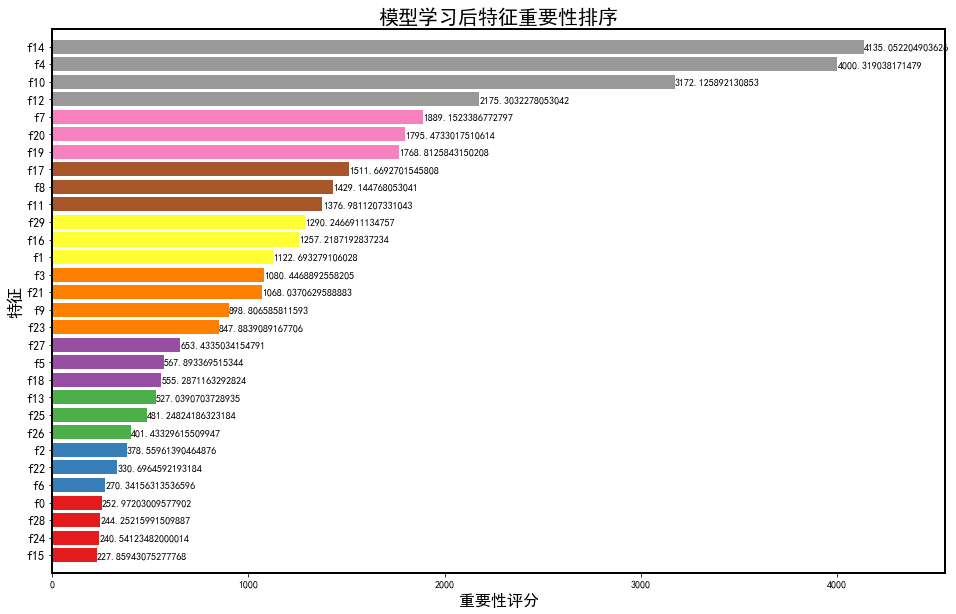

In [33]:
# 确定特征因子重要性
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制特征重要性评分
colours = plt.cm.Set1(np.linspace(0, 1, 30))
fig = plt.figure(figsize = (16, 10))
ax = fig.add_subplot(111)
ax = xgb.plot_importance(model,
                         height = 0.8,
                         color = colours,
                         grid = False,
                         show_values = True,
                         importance_type = 'cover',
                         ax = ax)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.set_xlabel('重要性评分', size = 16)
ax.set_ylabel('特征', size = 16)
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_title('模型学习后特征重要性排序', size = 20)

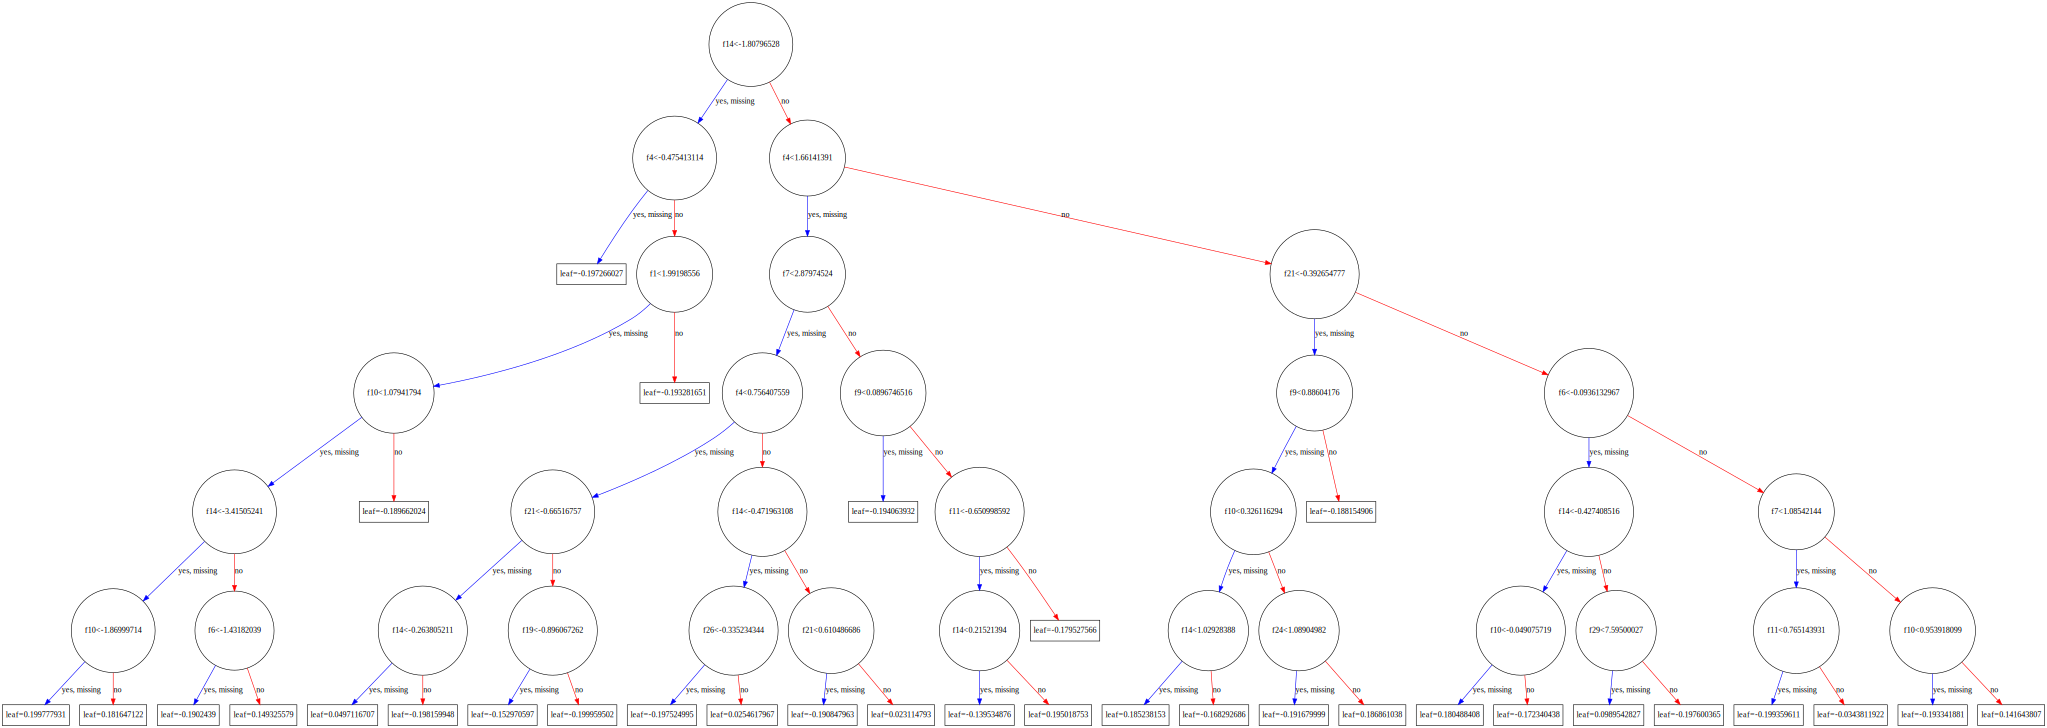

In [35]:
# 模型重要性的决策树可视化
plt.figure(figsize = (12, 8))
os.environ['PATH'] += os.pathsep + 'D:/Graphviz2.38/bin'
xgb.to_graphviz(model)

In [36]:
# 学习曲线显示精度
trainSizes, trainScores, crossValScores = learning_curve(
    xgb.XGBClassifier(silent = 1,
                      scale_pos_weight = weights,
                      n_jobs = -1,
                      eval_metric = 'auc',
                      n_estimators = 400,
                      max_depth = 6,
                      min_child_weight = min_child_weight,
                      subsample = subsample,
                      colsample_bytree = colsample_bytree,
                      reg_alpha = reg_alpha,
                      reg_lambda = reg_lambda,
                      seed = seed
                     ),
    X_dtrain,
    y_dtrain,
    cv = 5,
    scoring = 'accuracy'
)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

Text(0.5,1,'Learning Curves (70% samples)')

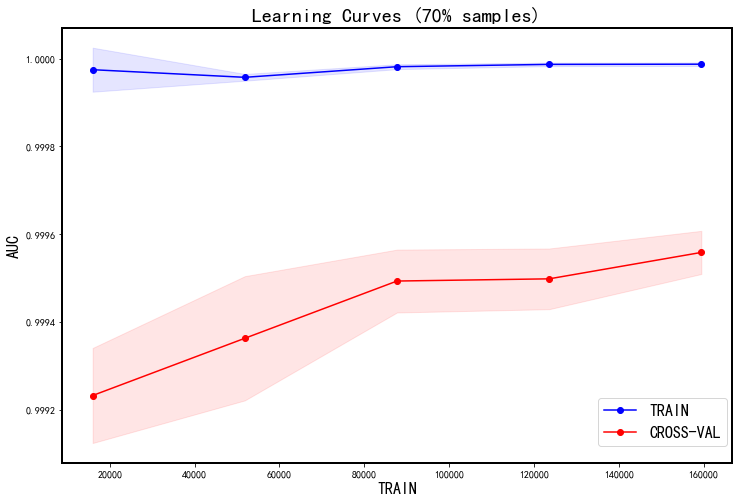

In [37]:
trainScoresMean = np.mean(trainScores, axis = 1)
trainScoresStd = np.std(trainScores, axis = 1)
crossValScoresMean = np.mean(crossValScores, axis = 1)
crossValScoresStd = np.std(crossValScores, axis = 1)

fig = plt.figure(figsize = (12, 8))
plt.fill_between(trainSizes,
                 trainScoresMean - trainScoresStd,
                 trainScoresMean + trainScoresStd,
                 alpha = 0.1,
                 color = 'b')
plt.fill_between(trainSizes,
                 crossValScoresMean - crossValScoresStd,
                 crossValScoresMean + crossValScoresStd,
                 alpha = 0.1,
                 color = 'r')
plt.plot(trainSizes,
         trainScores.mean(axis = 1),
         'o-',
         label = 'TRAIN',
         color = 'b')
plt.plot(trainSizes,
         crossValScores.mean(axis = 1),
         'o-',
         label = 'CROSS-VAL',
         color = 'r')

ax = plt.gca()
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,
           ['TRAIN', 'CROSS-VAL'],
           bbox_to_anchor = (0.8, 0.15),
           loc = 2,
           borderaxespad = 0,
           fontsize = 16)
plt.xlabel('TRAIN', size = 16)
plt.ylabel('AUC', size = 16)
plt.title('Learning Curves (70% samples)', size = 20)